# **Brief note on the dataset**

There are Four types of data in the dataset.

1.   **General Information of patient**

      * **Patient code** and  **Id** of Patient 
      * **Age** of the Patient - *Continuous variable*
      *  Patient's **event death** status - Whether he is alive or dead - *Binary variable* and can be considered as reponse variable.

2.   **Cancer related Information of Patient**

      * Total **Survival time** of cancer in Patient. - *Continuous variable*
      * **Reccurance Time** - If cancer is found after treatment, or after a period of time when the cancer couldn’t be detected.  - *Continuous variable*
      *  In dataset, Reccurence time is same as survival time for patients who are alive and less than survival time when patient died. May be because of cancer reccurence the patients died
      * **Grade** of Cancer - There are three grades of invasive breast cancer: Grade 1 looks most like normal breast cells and is usually slow growing. Grade 2 looks less like normal cells and is growing faster. Grade 3 looks different to normal breast cells and is usually fast growing. - *Discrete variable*
      * **Histological type** of cancer. It refers to the growth pattern of the tumours - *Discrete Variable*
      * **Diameter** of tumor.  - *Continuous variable*
      * No. of **pos nodes** of tumor.  - *Discrete Variable*
      * **Angioinv** indicates the extent to which the cancer has invaded blood vessels. - *Discrete Variable*
      * **lymphinfil** indicates the level of lymphocytic infiltration. - *Discrete Variable*

3.   **Treatment Performed on Patient**

      * Whether **Chemotheraphy** is performed on Patient - *Binary variable*
      * Whether **harmonal theraphy** is performed on patient - *Binary variable*
      *  If **Forequarter amputation** is performed on patient. Forequarter amputation is amputation of the arm, scapula and clavicle. - *Binary variable*

4.   **Gene related Information of patient**

      * Gene information is related to genes of particular tissue where cancer occurs. Each gene has different number based on its activity.
      This information is Extracted through **Gene expression Profiling**.
      All of these are *Continuous variables*
      * **Note:** We will deep dive into different terminology like gene, profiling,gene expression etc later for second question. For now think of Gene information as some scaled numbers that tell the activity of different genes.
      Ex - G3PDH_570, Contig45645_RC etc are different genes.








# **Research Work behind the the dataset**

Apart from General Information of Patient, cancer information and treatment performed, Gene data is most important information in the data set.

The clinical and histopathological parameters of 200 breast cancer patients were studied for their effects on clinical outcome using univariate/multivariate Cox regression. The **strength of Gene expression** based classification vs Standard markers was evaluated by adding this variable to Cox regression model.It was found out that TP53 mutation status and **gene expression profiles** are powerful markers of breast cancer.

Apart from this, another set of researchers had identified two unique subgroups in Estrogen receptor positive(ER+) type of breast cancer that has 100% survival.
In our dataset, may be one of histological types would represent ER+ subgroup.

1.   One of these groups had molecular activity that is similar to normal tissue and was already observed before and denoted as *Normal-like*
2.   The other expreses high level of C-MYB gene and low level of innate inflamatory gene and has molecular activity distinct from normal like. This type is named as **C-MYB+**.

To identify this, researchers have used the gene expression data used for above Cox regression model. Recognising shape of gene expression data at high dimension is very important to identify sub groups. To identify these geometric shapes researchers have used below mathematical methods.

  *   **Disease specific genomic analysis(DSGA):** It is a mathematical method of analysis of genomic data that highlights component of data related to disease. It defines a trnasformation that measures the extent to which diseased tissue deviates from normal tissue. 
  *   Here Genomic data of diseased tissue is split into two terms : a) normal component of data that mimics healthy tissue. b) diseased component that measures the deviation from normal. **T = Nc.T + Dc.T**.
  * **Progression Analysis of disease(PAD):** It is an approach to data analysis of disease that unravels geometry of datasets and provide easy access to outcome.This method is an application of **Mapper**, a mathematical tool that builds a simple geometric representation of data along preassigned guiding functions called filters.
  * Here we define an application of Mapper to the analysis of genomic data from disease, with guiding filter functions provided by Disease-Specific Genomic
Analysis (DSGA). The input to Mapper is transformed data from DSGA. PAD is main method for cluster analysis and it helped identify the unique sub groups of ER+.

Because of these different patterns within Gene expressions, gene information of a cell are very important data for identifying the survival








# **How do you think the creators of this dataset have calculated the values in column 17 to 1554? And what does the column names mean? **

To Understand this, we will dive deep into different terminology and cell functioning. 

Breast Cancer begins in **Epithelial tissue** or in tissue that lines internal organs.

*   **Tissue:** Group of cells that are structurally and functionally alike constitute a tissue.
*   **Gene:** A gene is the basic physical and functional unit of heredity. Genes are made up of DNA. Genes are present in cell nucleus. No matter how different the cells are, they all have same genes within a person. Each cell contains **25000-30000 genes**. 
* **Gene Expression:** Process by which information from gene is used to synthesis end products i.e proteins. DNA *transcription* produces mRNA and mRNA *translation* make proteins.
Gene ---> mRNA ---> Proteins. This conversion tells the **activity of the gene** like how active is it in making the end products.
* **Gene Expression Profiling:** It is the measurement of activity(expression) of thousands of genes at once to create global picture of cellular function. 
**Activity means measuring how much amount of mRNA is produced during transcription at different times at different conditions.** We check for mRNA because measuring proteins is difficult task. This activity is measured using a DNA-chip called **micro array** which is made of genes itself. The micro array consists of Single stranded DNA genes that are grouped into differnt groups.

Gene information in the dataset contains Gene activity(Expression) of some genes in a cells within an affected tissue. The numbers in the columns of genes represents amount of gene activity which is recorded using Gene expression Profiling.

Researchers have found that measuring this gene activity(expression) is crucial in determining the survival of patient. They have found different patterns withing these gene activity numbers of different genes as discussed in first question.






In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn import linear_model
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import itertools

In [39]:
path = '/content/sample_data/NKI_cleaned.csv'
df_NKI = pd.read_csv(path)
print('Dataset contains ',df_NKI.shape[0],'rows and ',df_NKI.shape[1],'columns')
df_NKI.head()

Dataset contains  272 rows and  1570 columns


,Patient,ID,age,eventdeath,survival,timerecurrence,chemo,hormonal,amputation,histtype,diam,posnodes,grade,angioinv,lymphinfil,barcode,esr1,G3PDH_570,Contig45645_RC,Contig44916_RC,D25272,J00129,Contig29982_RC,Contig56678_RC,Contig53047_RC,Contig19551,Contig47230_RC,Contig46501_RC,Contig20749_RC,AL157500,AL157502,Contig37376_RC,Contig45395_RC,X98307,AL157505,AB033027,Contig24026_RC,Contig27800_RC,Contig42500_RC,Contig7147,...,NM_001505,NM_001511,NM_002245,NM_018901,NM_002250,NM_001523,NM_018910,NM_000802,NM_002266,NM_001540,NM_002274,NM_001546,NM_002275,NM_002276,NM_001548,Contig51486_RC,NM_000824,NM_001554,NM_000826,NM_001555,NM_018942,NM_001565,NM_002299,NM_018950,NM_018952,Contig55606_RC,D25217,NM_000846,NM_000849,Contig29022_RC,Contig36312_RC,Contig38980_RC,NM_000853,NM_000854,NM_000860,Contig29014_RC,Contig46616_RC,NM_000888,NM_000898,AF067420
0,s122,18,43,0,14.817248,14.817248,0,0,1,1,25,0,2,3,1,6274,-0.413955,-0.954246,0.051024,-0.111203,-0.050066,-0.340897,-0.038770,-0.104256,-0.485671,-0.565482,0.159871,0.198546,0.131750,0.600214,0.034498,0.492915,0.032284,0.020498,0.162939,-0.026182,0.090109,-0.110716,0.025322,0.690928,...,-0.129174,-0.440579,0.091784,-0.385110,-0.289255,-0.485699,-0.405309,-0.109878,-0.472279,-0.331498,-0.358591,-0.070151,-0.145741,-0.247676,-0.551571,-0.201436,-0.323253,-0.031295,-0.596451,-0.891091,-0.099162,-0.721029,-0.071294,-0.399346,0.393402,-0.301836,-0.271553,-0.383663,0.278246,-0.216583,0.591103,-0.355018,0.373644,-0.760690,-0.164025,-0.038726,0.237856,-0.087631,-0.369153,0.153795
1,s123,19,48,0,14.261465,14.261465,0,0,0,1,20,0,3,3,1,6275,0.195251,0.244626,-0.199602,-0.111397,-0.135207,0.026813,-0.165675,0.081549,-0.736914,0.118127,-0.183824,0.265609,-0.080799,-0.034788,0.146600,0.096864,0.043611,0.049600,0.150307,-0.150096,-0.082436,-0.117535,-0.245531,-0.070265,...,-0.208322,-0.375427,-0.564630,0.200229,-0.256182,-0.157249,0.165127,-0.321392,-0.218458,-0.026051,-0.170069,-0.201066,-0.490440,0.089429,-0.352569,0.007789,0.171152,-0.074320,0.716055,-0.489632,-0.237086,-0.074905,-0.122872,-0.020308,-0.250971,0.291171,-0.263896,-0.348006,-0.172679,0.224676,-0.199829,-0.001635,-0.062922,-0.682204,-0.220934,-0.100088,-0.466537,-0.231547,-0.643019,-0.014098
2,s124,20,38,0,6.644764,6.644764,0,0,0,1,15,0,2,1,1,6276,0.596177,0.082434,-0.156199,-0.084980,-0.179003,-0.490377,-0.193691,0.186532,-0.801328,0.128750,0.403489,0.161287,0.030411,-0.074798,-0.190267,0.111516,-0.212994,-0.083166,0.363167,-0.202888,0.037665,-0.061916,0.082368,0.048723,...,0.179152,-0.470602,-0.080452,0.611942,-0.018856,0.170203,0.609129,-0.080603,-0.255806,-0.233129,0.251981,0.583411,0.827428,-1.056209,-0.068477,0.011319,-0.037401,-0.479714,0.774578,-0.256280,-0.010993,-0.445192,-0.191234,-0.088751,-0.200597,0.355198,-0.363763,-0.364457,0.211452,0.519197,0.328736,-0.047571,0.084228,-0.695950,-0.402840,-0.099965,0.110155,-0.114298,0.258495,-0.198911
3,s125,21,50,0,7.748118,7.748118,0,1,0,1,15,1,2,3,1,6277,0.501286,-1.071614,-0.206041,-0.051775,-0.049676,-0.306176,0.061596,0.115982,-0.842997,-0.020820,-0.189779,-0.003238,0.450045,-0.024921,-0.187729,0.012188,-0.110403,-0.036232,-0.014174,-0.192298,-0.116583,-0.117127,-0.082694,-0.005107,...,-0.131830,-0.423847,-0.732862,-0.437769,-0.337763,-0.230526,-0.371917,-0.148544,-0.554392,-0.436530,-0.298767,-0.292425,-0.658711,0.188053,-0.361884,0.263228,0.155554,-0.136231,-0.139935,-0.646764,-0.231747,-0.461515,-0.231232,-0.180521,0.160247,-0.400131,-0.429229,-0.382146,0.189681,-0.115396,0.648861,-0.039088,0.182182,-0.524640,0.037320,-0.167688,-0.016790,-0.285344,-0.251188,0.862710
4,s126,22,38,0,6.436687,6.318960,0,0,1,1,15,0,2,2,1,6278,-0.066771,-0.982276,-0.514666,-0.118483,-0.086523,-0.377659,-0.093353,0.302795,-0.794573,-0.001558,-0.210314,0.046650,-0.151043,-0.016541,-0.168022,0.048334,-0.049165,-0.060926,-0.060485,-0.061257,-0.018171,-0.057568,0.033263,0.070836,...,0.281523,-0.318070,-0.171916,0.064884,-0.261164,0.163015,0.057460,-0.190698,-0.144005,0.430455,-0.313115,0.141877,-0.7

# **Check for Null values and duplicates**

In [40]:
null_val = df_NKI.isnull().values.sum()
duplicate = sum(df_NKI.duplicated())
print('There are',null_val, 'null values and',duplicate,'duplicate rows')

There are 0 null values and 0 duplicate rows


In [41]:
print(df_NKI['ID'].nunique())
print(df_NKI['Patient'].nunique())
print(df_NKI['barcode'].nunique())

272
272
272


**As ID, Patient and barcode columns are unique for all the rows we have no use with them and we will discard them in next steps**

# **Check for data types and high level statistics.**

**We will look only till 16th column because we already know that from 17th column we have scaled gene activity numbers for every gene that are continuous**

In [6]:
df_filtered = df_NKI.iloc[:,2:16].copy()
df_filtered.dtypes

age                 int64
eventdeath          int64
survival          float64
timerecurrence    float64
chemo               int64
hormonal            int64
amputation          int64
histtype            int64
diam                int64
posnodes            int64
grade               int64
angioinv            int64
lymphinfil          int64
barcode             int64
dtype: object

In [7]:
df_filtered.describe()

,age,eventdeath,survival,timerecurrence,chemo,hormonal,amputation,histtype,diam,posnodes,grade,angioinv,lymphinfil,barcode
count,272.000000,272.000000,272.000000,272.000000,272.000000,272.000000,272.000000,272.000000,272.000000,272.000000,272.000000,272.000000,272.000000,272.000000
mean,44.047794,0.283088,8.080609,7.250433,0.393382,0.132353,0.441176,1.110294,22.529412,1.341912,2.128676,1.647059,1.261029,6222.783088
std,5.464538,0.451329,3.904874,4.177462,0.489401,0.339499,0.497443,0.545668,8.703345,2.108848,0.797821,0.876334,0.596629,645.378256
min,26.000000,0.000000,0.711841,0.271047,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,1.000000,1.000000,1.000000,4256.000000
25%,40.750000,0.000000,5.499738,4.389459,0.000000,0.000000,0.000000,1.000000,15.000000,0.000000,1.000000,1.000000,1.000000,6312.750000
50%,45.000000,0.000000,7.359343,6.950034,0.000000,0.000000,0.000000,1.000000,20.000000,0.000000,2.000000,1.000000,1.000000,6426.000000
75%,49.000000,1.000000,10.512662,9.986311,1.000000,0.000000,1.000000,1.000000,29.250000,2.000000,3.000000,3.000000,1.000000,6535.250000
max,53.000000,1.000000,18.340862,18.340862,1.000000,1.000000,1.000000,7.000000,50.000000,13.000000,3.000000,3.000000,3.000000,6617.000000




1.   **We see that average patient's age is 44 years.Youngest patient in dataset has 26 years. Oldest patient in dataset has 53 years.**
2.   **Average survival time of cancer in a patient is 8 years and maximum is 18 years, minimum is 7 months.**
3.   **We see average diameter of cancer is 22.5. Maximum diameter is 50 and minimum is 2. May be high diameter represents cronic scenario. we will look at this in EDA**
4. **All the continuous variables seems to be within known limits. So there might be no outliers in the data**



# **Check for Class Imbalance**

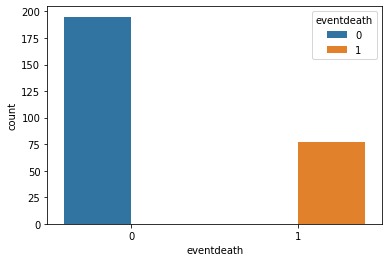

In [ ]:
sns.countplot(x = 'eventdeath', hue="eventdeath", data = df_NKI)

**There is clear class imbalance**

In [8]:
Percent_death = (df_NKI.loc[df_NKI['eventdeath']==1].shape[0]/df_NKI.shape[0])*100
print('Only',Percent_death,'% of data contains 1 label')

Only 28.308823529411764 % of data contains 1 label


# **Graphical analysis**

**Check if Age affects the death in case of breast canncer**

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


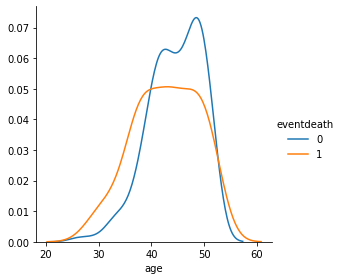

In [ ]:
sns.FacetGrid(df_NKI, hue = 'eventdeath', size=4).map(sns.distplot, 'age', hist=False).add_legend()



1.   *We cannot make any clear distinction between 0 and 1 claases*
2.   *But it is interesting to see that from 25 years to 38 years, probability of death of patient is slightly more than probability of being alive.*
3.*From 38 years to 53 years the pattern slightly changes and probability of patient being alive is more than prob. of death.*
4. *This is interesting because generally we think that young people would have slightly less probability of death. But it is otherwise here.*
5. *May be other factors like diameter of cancer, gene factors etc have lot of influence *



**Check if diameter of cancer affetcs the death**

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


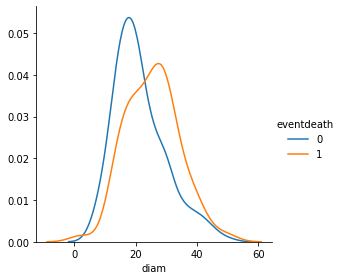

In [ ]:
sns.FacetGrid(df_NKI, hue = 'eventdeath', size=4).map(sns.distplot, 'diam', hist=False).add_legend()



1.   *Even here we cannot make proper distiction between 0 and 1 classes*

1.   *But we can see that if diameter of cancer is more then probability of death is slightly more*
2.   *From diamter 25 to 60, the probability of death is slightly more than probability of being alive.*
4. *This is as per our inference that if diameter is more then it might be chronic case*




**Check if esr1 Gene affects the survival**

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


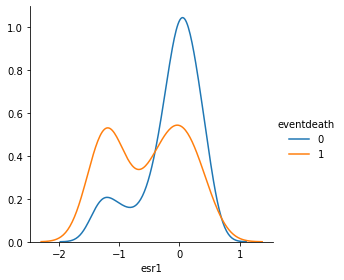

In [ ]:
sns.FacetGrid(df_NKI, hue = 'eventdeath', size=4).map(sns.distplot, 'esr1', hist=False).add_legend()



1.  *Here we can see that if activity of this gene is less i.e < -0.5 the probability of survival is very less when compared to probability of being alive*
2.   *When the activity is >0.5 then probability of survival is high*



**Check if treatment like chemo/harmonal/amputation has any impact on survival**

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` param

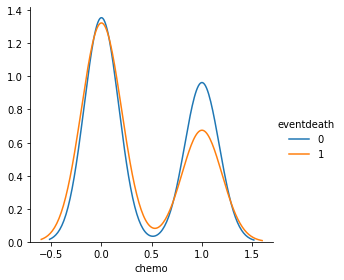

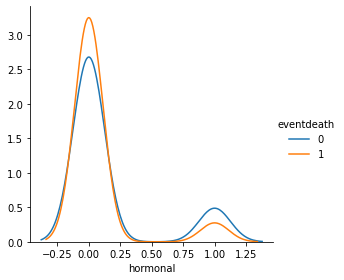

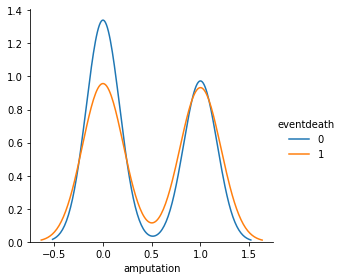

In [ ]:
ax1= sns.FacetGrid(df_NKI, hue = 'eventdeath', size=4).map(sns.distplot, 'chemo', hist=False).add_legend()
ax2= sns.FacetGrid(df_NKI, hue = 'eventdeath', size=4).map(sns.distplot, 'hormonal', hist=False).add_legend()
ax3= sns.FacetGrid(df_NKI, hue = 'eventdeath', size=4).map(sns.distplot, 'amputation', hist=False).add_legend()
plt.show()



1.   *From above 3 plots we can see that there is slightly more probability of survival when chemo/hormonal theraphy is done.*
2.   *But when it comes to amputation, PDF's are almost overlapping. That means even if amputation is done we cannot say if patient would survive or not. May be this is because amputation is the last resort to be done at advanced stages*




**Check if grade affects the survival**

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


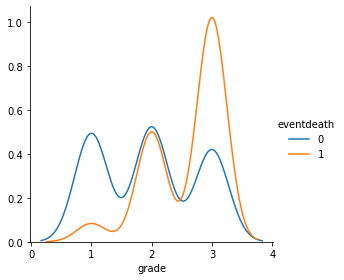

In [ ]:
sns.FacetGrid(df_NKI, hue = 'eventdeath', size=4).map(sns.distplot, 'grade', hist=False).add_legend()

*We can clearly see that if grade if grade of cancer 3 then probability of survival is less. When grade is 1 then probability of survivl is more.If grade is 2 then the PDF'S are overlapping. it means survival and death are equiprobable. So higher the grade more chronic is the disease*

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


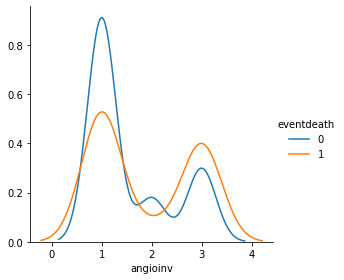

In [157]:
sns.FacetGrid(df_NKI, hue = 'eventdeath', size=4).map(sns.distplot, 'angioinv', hist=False).add_legend()

*The above plot shows that if angioinv(how blood vessels are afected) is 1 which might be less affected then probability of survival is more than probability of death. If it is 3 which might be advanced stage then prob of death is slightly more.*

**Bivariate analysis of ESR1 gene and Diameter**

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


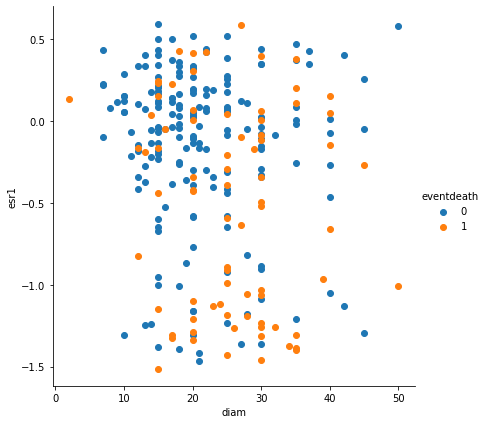

In [ ]:
sns.FacetGrid(df_NKI, hue = 'eventdeath', size=6).map(plt.scatter, 'diam', 'esr1').add_legend()



1.   *From above plot we can see that there is more density of blue points i.e survival when esr1>-0.5 and diamter of cancer is less than 25.*
2.   *Though the plot is scattered a lot, there is some good chances of survival when diameter of cancer is less and ESR gene activity is high*

# **Predictive modelling**

**Train test split**

In [43]:
# data splitting
X = df_NKI.drop(['Patient', 'ID', 'eventdeath', 'barcode'], axis=1)
y = df_NKI['eventdeath']
X_filter = X.iloc[:,:12]
X_train, X_test, y_train, y_test = train_test_split(X_filter, y, test_size=0.3, random_state=42)

*Here we removed Gene information because it is reducing the accuracy/F1 score of the model*

**Tackle Class imbalance**

In [57]:
 def class_imbalance(type_, X,Y):
    if type_ == 'over_sample':
        oversample = RandomOverSampler(sampling_strategy=0.8)
        X_over, y_over = oversample.fit_resample(X,Y)
        return X_over, y_over
    elif type_ == 'SMOTE':
        over = SMOTE(sampling_strategy=0.8)
        X_over, y_over = over.fit_resample(X,Y)
        return X_over, y_over

In [58]:
X_train_os, y_train_os = class_imbalance('over_sample', X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


**Confusion matrix is very important for imbalanced datasets.Below function plots Confusion matrix**

In [47]:
def plot_confusionMatrix(cm, classes, cmap, title):
    
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    
    tick_marks = np.arange(len(classes))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)
    
    #fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], '.2f'),
        horizontalalignment="center",
        color="white" if cm[i, j] > thresh else "black")
        
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


**Below function trains the model and predicts for test dataset and returns metrics**

In [52]:
def perform_model(model, X_train, Y_train, X_test, Y_test, class_labels):
    
    results = dict()
    
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test.values)

    results['predicted'] = Y_pred
    
    accuracy = metrics.accuracy_score(y_true=Y_test, y_pred=Y_pred)
    results['accuracy'] = accuracy
    
    cm = metrics.confusion_matrix(Y_test, Y_pred) 
    results['confusion_Matrix'] = cm 
    
    plt.figure(figsize=(8,8)) 
    plot_confusionMatrix(cm, class_labels, plt.cm.Blues, 'Confusion matrix') 
    plt.show()
    
    classification_report = metrics.classification_report(Y_test, Y_pred)
    print(classification_report)
    # store report in results
    results['classification_report'] = classification_report    
    
    results['model'] = model
       
    return results

In [49]:
def print_grid_search_attributes(model):
    
    print('|      Best Estimator     |')
    print('--------------------------')
    print('\n\t{}\n'.format(model.best_estimator_))
    
    print('|     Best parameters     |')
    print('--------------------------')
    print('\tParameters of best estimator : \n\n\t{}\n'.format(model.best_params_))
 
    
    print('--------------------------')
    print('\n\tAverage Cross Validate scores of best estimator : \n\n\t{}\n'.format(model.best_score_))

In [50]:
labels = [0,1]

**XG Boost Model**

Fitting 3 folds for each of 120 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 164 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:    9.1s finished


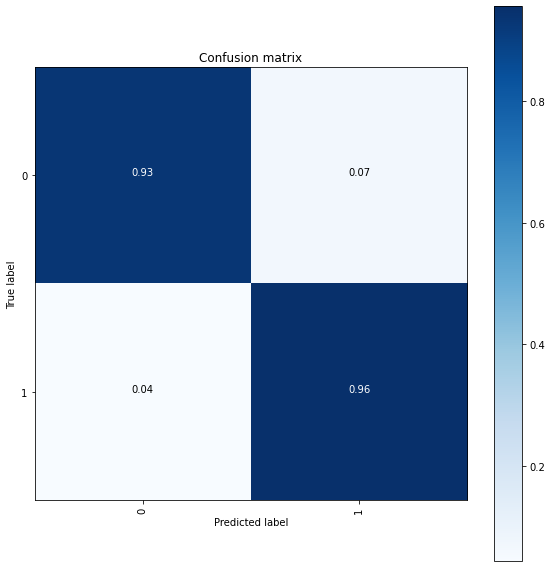

              precision    recall  f1-score   support

           0       0.98      0.93      0.96        59
           1       0.85      0.96      0.90        23

    accuracy                           0.94        82
   macro avg       0.91      0.94      0.93        82
weighted avg       0.94      0.94      0.94        82



In [175]:
parameters = {'eta':[0.1,0.2,0.4,0.6,0.8], 'n_estimators':[50,100,150,200,300,400], 'colsample_bytree':[0.5,0.6,0.8,1]}
xgb_clf = XGBClassifier()
xgb_clf_grid = GridSearchCV(xgb_clf, param_grid=parameters, cv=3, verbose=1, n_jobs=-1)
xgb_clf_grid_results =  perform_model(xgb_clf_grid, X_train_os, y_train_os, X_test, y_test, labels)

**Best Estimator**

In [178]:
print_grid_search_attributes(xgb_clf_grid)

|      Best Estimator     |
--------------------------

	XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eta=0.1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

|     Best parameters     |
--------------------------
	Parameters of best estimator : 

	{'colsample_bytree': 1, 'eta': 0.1, 'n_estimators': 100}

--------------------------

	Average Cross Validate scores of best estimator : 

	0.9345578640971595



 

1.   **XGBoost gave us better accuracy and F1 score than Logistic regression.**
2.   **The Train and test metrics does'nt differ much so no overfitting problems.**
3.**But it is important to note that, If we include gene information the accuracy is getting reduced to good extent. It might be because of small data and the model is unable to identify complex patterns in small data**

# **Now we look into some distance based algorithms like KNN and SVM. For distance based algorithms scaling is most important factor**

**Feature scaling on train data**

In [16]:
scaled_features = X_train[['age', 'survival', 'timerecurrence', 'diam']].copy()
scaler = StandardScaler()
scaler.fit(scaled_features)
scaled_features_train = scaler.transform(scaled_features)

**One hot encoding on discrete data**

In [17]:
one_hot_features = X_train[['histtype', 'posnodes', 'grade', 'angioinv', 'lymphinfil']].copy()
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(one_hot_features)
one_hot_features = enc.transform(one_hot_features)

In [18]:
rest_features = X_train[['chemo', 'hormonal', 'amputation']].copy().values

In [19]:
final_train = np.hstack((scaled_features_train, one_hot_features.toarray(), rest_features))
final_train.shape

(190, 30)

In [33]:
X_train_os, y_train_os = class_imbalance('over_sample', final_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


**Transforming Test Data**

In [21]:
scaled_features_test = X_test[['age', 'survival', 'timerecurrence', 'diam']].copy()
scaled_features_test = scaler.transform(scaled_features_test)
one_hot_features_test = X_test[['histtype', 'posnodes', 'grade', 'angioinv', 'lymphinfil']].copy()
one_hot_features_test = enc.transform(one_hot_features_test)
rest_features_test = X_test[['chemo', 'hormonal', 'amputation']].copy()
final_test = np.hstack((scaled_features_test, one_hot_features_test.toarray(), rest_features_test))
final_test.shape

(82, 30)

**KNN Implementation**

Fitting 3 folds for each of 28 candidates, totalling 84 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  84 out of  84 | elapsed:    0.4s finished


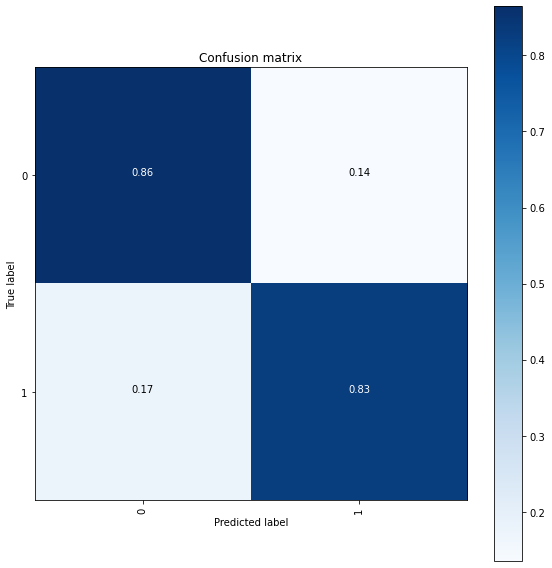

              precision    recall  f1-score   support

           0       0.93      0.86      0.89        59
           1       0.70      0.83      0.76        23

    accuracy                           0.85        82
   macro avg       0.82      0.85      0.83        82
weighted avg       0.86      0.85      0.86        82



In [34]:
parameters = {'n_neighbors':[3,5,6,8,10,12,14], 'weights':['uniform','distance'], 'p': [1,2]}
knn_clf = KNeighborsClassifier()
knn_clf_grid = GridSearchCV(knn_clf, param_grid=parameters, cv=3, verbose=1, n_jobs=-1)
knn_clf_grid_results =  perform_model(knn_clf_grid, X_train_os, y_train_os, final_test, y_test, labels)

In [31]:
print_grid_search_attributes(knn_clf_grid)

|      Best Estimator     |
--------------------------

	KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=14, p=2,
                     weights='distance')

|     Best parameters     |
--------------------------
	Parameters of best estimator : 

	{'n_neighbors': 14, 'p': 2, 'weights': 'distance'}

--------------------------

	Average Cross Validate scores of best estimator : 

	0.9509685837599117





1.   **F1 score of class 1 is much less than that of XGBOOST.
XGBoost seems to give much better performance**
2.   **KNN is slightly overfitting because CV metrics are greater than test metrics by 10%.**



**SVM Implementatiom**

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    0.9s finished


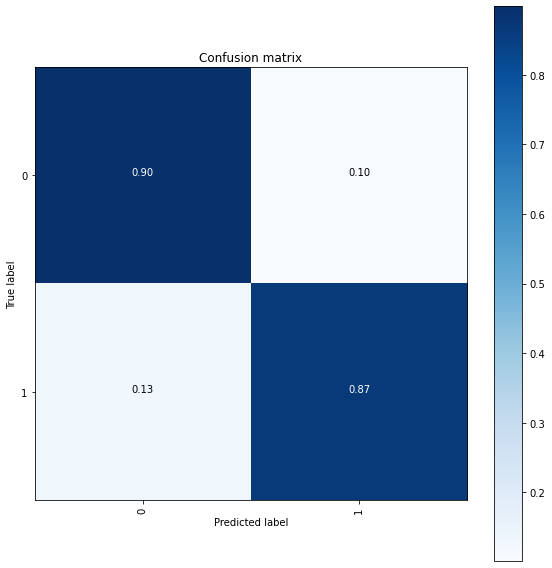

              precision    recall  f1-score   support

           0       0.95      0.90      0.92        59
           1       0.77      0.87      0.82        23

    accuracy                           0.89        82
   macro avg       0.86      0.88      0.87        82
weighted avg       0.90      0.89      0.89        82



In [36]:
parameters = {'C':[0.01,0.1,1,5,10], 'kernel':['linear','rbf']}
svc_clf = SVC()
svc_clf_grid = GridSearchCV(svc_clf, param_grid=parameters, cv=3, verbose=1, n_jobs=-1)
svc_clf_grid_results =  perform_model(svc_clf_grid, X_train_os, y_train_os, final_test, y_test, labels)

In [37]:
print_grid_search_attributes(svc_clf_grid)

|      Best Estimator     |
--------------------------

	SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

|     Best parameters     |
--------------------------
	Parameters of best estimator : 

	{'C': 1, 'kernel': 'rbf'}

--------------------------

	Average Cross Validate scores of best estimator : 

	0.8720930232558141



*SVC with RBF kernel seems to be working fine than KNN*

Of the three models XGBOOST is giving us better F1 score for both the classes.